# Agrupamento - K-Means

Primeiro, os devidos $\texttt{import}$s:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import copy

Iremos trabalhar com o banco de dados Iris.


In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

Inicialmente, para melhor visualização, escolhemos como características somente<br>o comprimento de sépala (primeira característica) e<br> a largura de pétala (quarta característica).

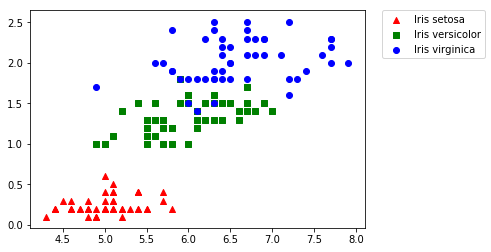

In [3]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(X[0:50,0], X[0:50,3], c='r', marker='^', label="Iris setosa")
ax1.scatter(X[50:100,0], X[50:100,3], c='g', marker='s', label="Iris versicolor")
ax1.scatter(X[100:150,0], X[100:150,3], c='b', marker='o', label="Iris virginica")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Notamos que, usando somente as primeira e quarta características, a <font color='red'>Iris setosa</font> é linearmente separável das outras, o que não ocorre com a <font color='green'>Iris versicolor</font> e <font color='blue'>Iris viginica</font>. <br>
O mesmo ocorre no espaço 4-dimensional.

Inicialmente, consideraremos somente as espécies Iris setosa e Iris virginica, que são linearmente separáveis.

In [4]:
Y = np.concatenate((X[0:50,(0,3)],X[100:150,(0,3)]), axis=0)
print('centroide Iris setosa =', np.mean(Y[0:50], axis=0))
print('centroide Iris virginica =', np.mean(Y[50:100], axis=0))

centroide Iris setosa = [5.006 0.244]
centroide Iris virginica = [6.588 2.026]


Visulizando a primeira e quarta características:

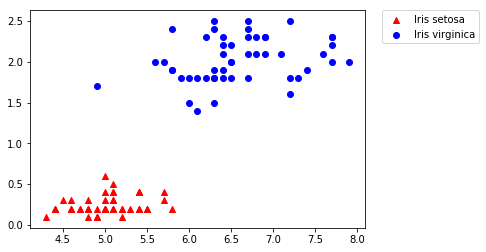

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(Y[0:50,0], Y[0:50,1], c='r', marker='^', label="Iris setosa")
ax1.scatter(Y[50:100,0], Y[50:100,1], c='b', marker='o', label="Iris virginica")
ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## K-Means

Agora, o algoritmo propriamente dito.

In [6]:
# Algoritmo K-Means
n, c = Y.shape # número de amostras e de características
k = 2 # números de agrupamentos

#centers = Y[np.random.choice(n, k, replace=False), :] # escolhe k amostras para centroides
centers = Y[0:k,:] # escolhe as k primeiras amostras para centroides. Má ideia!, mas...

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = copy.deepcopy(centers) # to store new centers

clusters = np.zeros(n) # índice do agrupamento
distances = np.zeros((n,k)) # distâncias de cada amostra a cada centroide

error = np.linalg.norm(centers_new - centers_old) # aqui usamos distância!

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(Y - centers_new[i], axis=1)  # aqui usamos distância!
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    centers_old = copy.deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(Y[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
    
    #print('error =', error)
    
print('clusters =', clusters) 
print('clusters centers =', centers_new)
print('centroide Iris setosa =', np.mean(Y[0:50], axis=0))
print('centroide Iris virginica =', np.mean(Y[50:100], axis=0))

clusters = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
clusters centers = [[6.62244898 2.03265306]
 [5.00392157 0.27254902]]
centroide Iris setosa = [5.006 0.244]
centroide Iris virginica = [6.588 2.026]


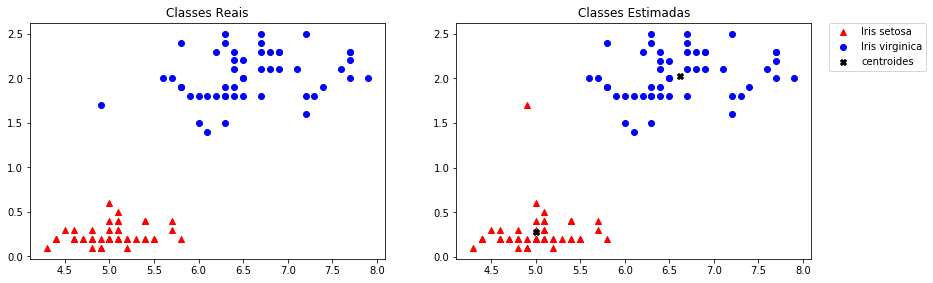

In [7]:
# Mostrar os centros dos agrupamentos (características 0 e 3)
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(121)
plt.title('Classes Reais')
ax1.set_aspect('equal', 'box')
ax1.scatter(Y[0:50,0], Y[0:50,1], c='r', marker='^', label="Iris setosa")
ax1.scatter(Y[50:100,0], Y[50:100,1], c='b', marker='o', label="Iris virginica")
ax1 = fig.add_subplot(122)
fig.set_figheight(50)
plt.title('Classes Estimadas')
ax1.set_aspect('equal', 'box')
ax1.scatter(Y[clusters == 1,0], Y[clusters == 1,1], c='r', marker='^', label="Iris setosa")
ax1.scatter(Y[clusters == 0,0], Y[clusters == 0,1], c='b', marker='o', label="Iris virginica")
#ax1.scatter(Y[56,0], Y[56,1], c='yellow', marker='*') # outlier da espécie Iris virginica
ax1.scatter(centers_new[:,0], centers_new[:,1], c='black', marker='X', label="centroides")
ax1.legend(bbox_to_anchor=(1.05, 1.00), loc=2, borderaxespad=0.0)

Vejamos as distâncias do outlier (Y[56]) aos centroides:

In [8]:
if clusters[56] == 0:
    print('distância de Y[56] ao centroide vermelho =', np.linalg.norm(Y[56] - centers_new[0]))
    print('distância de Y[56] ao centroide azul =', np.linalg.norm(Y[56] - centers_new[1]))
else:
    print('distância de Y[56] ao centroide vermelho =', np.linalg.norm(Y[56] - centers_new[1]))
    print('distância de Y[56] ao centroide azul =', np.linalg.norm(Y[56] - centers_new[0]))
    
print('distância de Y[56] ao centroide real da Iris setosa (vermelho) =',  
      np.linalg.norm(Y[56] - np.mean(Y[0:50], axis=0)))
print('distância de Y[56] ao centroide real da Iris virginica (azul) =',  
      np.linalg.norm(Y[56] - np.mean(Y[50:100], axis=0)))


distância de Y[56] ao centroide vermelho = 1.4312288404893607
distância de Y[56] ao centroide azul = 1.7542772148206731
distância de Y[56] ao centroide real da Iris setosa (vermelho) = 1.4598534172991477
distância de Y[56] ao centroide real da Iris virginica (azul) = 1.7191916705242594


Concluindo: utilizando somente as características 0 e 3, a amostra 56 é mais similar à espécie Iris setosa que à sua espécie (Iris viginica).<br>
Pelo menos quando usamos a distância euclidiana...

Vejamos, então, o que acontece quando aplicamos o K-Means com as quatro características.

In [9]:
Z = np.concatenate((X[0:50,:],X[100:150,:]), axis=0)

Aproveitando para criar uma função...

In [10]:
# Algoritmo K-Means
def my_k_means(X, k):    
    n, c = X.shape # número de amostras e de características

    centers = X[np.random.choice(n, k, replace=False), :] # escolhe k amostras para centroides
    #centers = X[0:k,:] # escolhe as k primeiras amostras para centroides. Má ideia!, mas...

    centers_old = np.zeros(centers.shape) # to store old centers
    centers_new = copy.deepcopy(centers) # to store new centers

    clusters = np.zeros(n) # índice do agrupamento
    distances = np.zeros((n,k)) # distâncias de cada amostra a cada centroide

    error = np.linalg.norm(centers_new - centers_old) # aqui usamos distância!

    # When, after an update, the estimate of that center stays the same, exit loop
    while error != 0:
        # Measure the distance to every center
        for i in range(k):
            distances[:,i] = np.linalg.norm(X - centers_new[i], axis=1)  # aqui usamos distância!
        # Assign all training data to closest center
        clusters = np.argmin(distances, axis = 1)
        centers_old = copy.deepcopy(centers_new)
        # Calculate mean for every cluster and update the center
        for i in range(k):
            centers_new[i] = np.mean(X[clusters == i], axis=0)
        error = np.linalg.norm(centers_new - centers_old)
    
    print('clusters =', clusters) 
    print('clusters centers =', centers_new)
    
my_k_means(Z, 2)

print('centroide Iris setosa =', np.mean(Z[0:50], axis=0))
print('centroide Iris virginica =', np.mean(Z[50:100], axis=0))

clusters = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
clusters centers = [[5.006 3.418 1.464 0.244]
 [6.588 2.974 5.552 2.026]]
centroide Iris setosa = [5.006 3.418 1.464 0.244]
centroide Iris virginica = [6.588 2.974 5.552 2.026]


Vamos ver o que acontece quando trocamos a Iris virginica pela Iris versicolor.

In [11]:
Z = np.concatenate((X[0:50,:],X[50:100,:]), axis=0)
my_k_means(Z, 2)

print('centroide Iris setosa =', np.mean(Z[0:50], axis=0))
print('centroide Iris versicolor =', np.mean(Z[50:100], axis=0))

clusters = [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
clusters centers = [[5.936 2.77  4.26  1.326]
 [5.006 3.418 1.464 0.244]]
centroide Iris setosa = [5.006 3.418 1.464 0.244]
centroide Iris versicolor = [5.936 2.77  4.26  1.326]


Como dissemos, a classe Iris setosa é separável das classes Iris versicolor e Iris virginica.

Não podemos resistir...

In [12]:
Z = np.concatenate((X[50:100,:],X[100:150,:]), axis=0)
my_k_means(Z, 2)

print('centroide Iris versicolor =', np.mean(Z[0:50], axis=0))
print('centroide Iris virginica =', np.mean(Z[50:100], axis=0))

clusters = [1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1]
clusters centers = [[6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
centroide Iris versicolor = [5.936 2.77  4.26  1.326]
centroide Iris virginica = [6.588 2.974 5.552 2.026]


O que mostra qua as espécies Iris versicolor e Iris virginica <b>não</b> são linearmente separáveis.

Por fim, vamos aplicar o K-Means no conjunto completo.

In [13]:
my_k_means(X, 3)

clusters = [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
clusters centers = [[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
